In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

In [2]:
df = pd.read_csv('./Kaggle/spam_detection/spam.csv', encoding='latin-1')
df = df[df.columns[0:2]]
df.columns = ['status','text']

In [3]:
index = []
for i in range(len(df)):
    if df['status'][i] == 'ham':
        index.append(0)
    else:
        index.append(1)
df['index'] = index
df = df.drop(['status'], axis=1 )

In [4]:
df.head()

,text,index
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [4]:
df['length'] = df['text'].apply(len)
df.head()

,text,index,length
0,"Go until jurong point, crazy.. Available only ...",0,111
1,Ok lar... Joking wif u oni...,0,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,U dun say so early hor... U c already then say...,0,49
4,"Nah I don't think he goes to usf, he lives aro...",0,61


In [5]:
df[df['index'] == 0].describe()

,index,length
count,4825.0,4825.000000
mean,0.0,71.023627
std,0.0,58.016023
min,0.0,2.000000
25%,0.0,33.000000
50%,0.0,52.000000
75%,0.0,92.000000
max,0.0,910.000000


c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='length'>

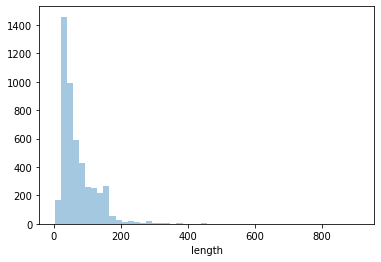

In [6]:
sns.distplot(a = df[df['index'] == 0].length, kde=False)

<AxesSubplot:xlabel='length'>

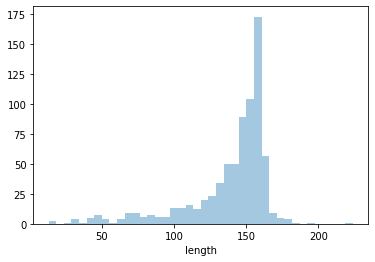

In [7]:
sns.distplot(a = df[df['index'] == 1].length, kde=False)

In [8]:
for i in range(20):
    if df['index'][i] == 1:
        print(df['text'][i] + '\n')

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv

WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.

Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030

SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info

URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18

XXXMobileMovieClub: To use your credit, click the WAP link in the next txt messag

In [9]:
df['contain']=df['text'].str.contains('£').map({False:0,True:1})
df['contain']=df['contain']|df['text'].str.contains('%').map({False:0,True:1})
df['contain']=df['contain']|df['text'].str.contains('€').map({False:0,True:1})
df['contain']=df['contain']|df['text'].str.contains('\$').map({False:0,True:1})
df['contain']=df['contain']|df['text'].str.contains("T&C").map({False:0,True:1})
df['contain']=df['contain']|df['text'].str.contains("www|WWW").map({False:0,True:1})
df['contain']=df['contain']|df['text'].str.contains("http|HTTP").map({False:0,True:1})
df['contain']=df['contain']|df['text'].str.contains("https|HTTPS").map({False:0,True:1})
df['contain']=df['contain']|df['text'].str.contains("@").map({False:0,True:1})
df['contain']=df['contain']|df['text'].str.contains("email|Email|EMAIL").map({False:0,True:1})
df['contain']=df['contain']|df['text'].str.contains("SMS|sms|FREEPHONE").map({False:0,True:1})
df['contain']=df['contain']|df['text'].str.contains("\d{11}",regex=True).map({False:0,True:1})
df['contain']=df['contain']|df['text'].str.contains("\d{10}",regex=True).map({False:0,True:1})
df['contain']=df['contain']|df['text'].str.contains("\d{5}",regex=True).map({False:0,True:1})

df.head()

,text,index,length,contain
0,"Go until jurong point, crazy.. Available only ...",0,111,0
1,Ok lar... Joking wif u oni...,0,29,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,1
3,U dun say so early hor... U c already then say...,0,49,0
4,"Nah I don't think he goes to usf, he lives aro...",0,61,0


In [10]:
cleaned_text = []


a = df['text'][0]

for i in range(len(df)):
    updated_string = []
    for j in range(len(df['text'][i])):
        if df['text'][i][j] not in string.punctuation:
            if df['text'][i][j].isdigit()==False:
                updated_string.append(df['text'][i][j])
    updated_text=''.join(updated_string)
    cleaned_text.append(updated_text)

In [11]:
df['cleaned_text'] = cleaned_text
df.drop(['text'],axis=1,inplace=True)
df.head()

,index,length,contain,cleaned_text
0,0,111,0,Go until jurong point crazy Available only in ...
1,0,29,0,Ok lar Joking wif u oni
2,1,155,1,Free entry in a wkly comp to win FA Cup final...
3,0,49,0,U dun say so early hor U c already then say
4,0,61,0,Nah I dont think he goes to usf he lives aroun...


In [20]:
token = []
for i in range(len(df)):
    token.append(df['cleaned_text'][i].lower().split(" "))
df['token'] = token
df.head()

,index,length,contain,cleaned_text,token
0,0,111,0,Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,0,29,0,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,1,155,1,Free entry in a wkly comp to win FA Cup final...,"[free, entry, in, , a, wkly, comp, to, win, fa..."
3,0,49,0,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,0,61,0,Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."
